In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import string
import time
data = pd.read_excel('/content/drive/MyDrive/MC/Assessments/A2 & A3/scraped_data/Master files/df2.xlsx') # full set of comments

In [ ]:
data.head()

,Unnamed: 0,comment,hashtag,target,basis,prejudicial,offensive,ironic,stereotype
0,0,Another amazing video! So wonderful to see all...,Hazara,NaN,NaN,0,0,0,n
1,1,"Beautiful people, love from Iran to my lovely ...",Hazara,NaN,NaN,0,0,0,n
2,2,Love my nation Hazara,Hazara,NaN,NaN,0,0,0,n
3,3,Be healthy friends,Hazara,NaN,NaN,0,0,0,n
4,4,"Greetings, dear people",Hazara,NaN,NaN,0,0,0,n


In [ ]:
print(len(data))
data.drop_duplicates(subset=['comment','stereotype'],keep='first',inplace=True)
print(len(data))

2533
2313


In [ ]:
def clean_text(text ): 
    delete_dict = {sp_character: ' ' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>2))]) 
    
    return text2.lower().split(' ')

In [ ]:
df1 = data.sample(n=1000)
print(len(df1))
df1.dropna(axis = 0, how ='any',inplace=True) 
df1['comment']= df1['comment'].apply(clean_text)
print(len(df1))

1000
117


In [ ]:
df1.head()

,Unnamed: 0,comment,hashtag,target,basis,prejudicial,offensive,ironic,stereotype
1776,2059,"[those, are, chinese, mongolian, decendents, j...",SHG,Hazaras,Race/ ethnicity,1,1,1,y
54,57,"[hazaras, are, the, descendents, the, soldiers...",Hazara,Hazaras,Race/ ethnicity,0,0,0,y
1052,1069,"[that, surprise, what, one, expect, from, terr...",SHG,Afghans,Race/ ethnicity,1,0,1,y
727,739,"[make, man, out, you, ina, nutshell]",SHG,Hazaras,Gender,0,1,0,y
447,457,"[this, full, false, facts, and, claims]",Hazara,Media,Geopolitics,1,1,0,y


In [ ]:
sentences = df1['comment'].tolist()

In [ ]:
print(len(sentences))
print(sentences[0])
print(sentences[-1])

117
['those', 'are', 'chinese', 'mongolian', 'decendents', 'just', 'matter', 'time', 'before', 'chinese', 'boys', 'paying', 'visit']
['they', 'must', 'convert', 'back', 'bhudhist', 'they', 'must', 'also', 'fight', 'for', 'separate', 'country']


In [ ]:
#!pip install gensim
import gensim
#https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4

In [ ]:
from gensim.models.callbacks import CallbackAny2Vec
from gensim.models import Word2Vec

# init callback class
class callback(CallbackAny2Vec):
    """
    Callback to print loss after each epoch
    """
    def __init__(self):
        self.epoch = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        
        if self.epoch == 0:
            print('Loss after epoch {}: {}'.format(self.epoch, loss))
        elif self.epoch % 100 == 0:
            print('Loss after epoch {}: {}'.format(self.epoch, loss- self.loss_previous_step))
        
        
        self.epoch += 1
        self.loss_previous_step = loss

Don't run this chunk - just upload the saved model

In [ ]:
# init word2vec class
w2v_model = Word2Vec(vector_size = 200,    #number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word)
                     window = 15,   #maximum number of words between a target word and words around the target word
                     min_count = 2, #words with an occurrence less than this count will be ignored
                     workers = 20,  #number of threads to use while training
                     sg = 1,        #we are using Skip Gram algorithm; if you set sg = 0 then the algorithm will be CBOW
                     negative = 5,  #negative sampling will be used 
                     sample = 1e-5) #threshold for configuring which higher-frequency words are randomly downsampled
# build vocab


w2v_model.build_vocab(sentences)

  
# train the w2v model (fitting)
start = time.time()
w2v_model.train(sentences, 
                total_examples=w2v_model.corpus_count, 
                epochs=1001, 
                report_delay=1,
                compute_loss = True, # set compute_loss = True
                callbacks=[callback()]) # add the callback class
end = time.time()


print("elapsed time in seconds :"+ str(end - start))
# save the word2vec model
w2v_model.save('/content/drive/MyDrive/Colab Notebooks/data/word2vec_yt.model')

Loss after epoch 0: 116.53768157958984
Loss after epoch 100: 303.0
Loss after epoch 200: 337.22265625
Loss after epoch 300: 209.6171875
Loss after epoch 400: 194.515625
Loss after epoch 500: 181.71875
Loss after epoch 600: 51.2578125
Loss after epoch 700: 86.296875
Loss after epoch 800: 136.078125
Loss after epoch 900: 263.9375
Loss after epoch 1000: 119.609375
elapsed time in seconds :6.6689369678497314


In [ ]:
reloaded_w2v_model = Word2Vec.load('/content/drive/MyDrive/Colab Notebooks/data/word2vec_yt.model')
#words = list(reloaded_w2v_model.wv.vocab)
words = list(reloaded_w2v_model.wv.key_to_index)
print('Vocab size: '+str(len(words)))
print()

# POSITIVE
print("POSITIVE Top 10 words similar to:")
w1 = 'hazara'
print("\033[1m{w}\033[0m:".format(w=w1), reloaded_w2v_model.wv.most_similar(positive = w1,topn =10))
w5 = 'hazaras'
print("\033[1m{w}\033[0m:".format(w=w5), reloaded_w2v_model.wv.most_similar(positive = w5,topn =10))
w2 = 'afghan'
print("\033[1m{w}\033[0m:".format(w=w2), reloaded_w2v_model.wv.most_similar(positive = w2,topn =10))
w3 = 'genocide'
print("\033[1m{w}\033[0m:".format(w=w3), reloaded_w2v_model.wv.most_similar(positive = w3,topn =10))
w6 = 'taliban'
print("\033[1m{w}\033[0m:".format(w=w6), reloaded_w2v_model.wv.most_similar(positive = w6,topn =10))
print()
# NEGATIVE
print("NEGATIVE Top 10 words similar to:")
w1 = 'hazara'
print("\033[1m{w}\033[0m:".format(w=w1), reloaded_w2v_model.wv.most_similar(negative = w1,topn =10))
w5 = 'hazaras'
print("\033[1m{w}\033[0m:".format(w=w5), reloaded_w2v_model.wv.most_similar(negative = w5,topn =10))
w2 = 'afghan'
print("\033[1m{w}\033[0m:".format(w=w2), reloaded_w2v_model.wv.most_similar(negative = w2,topn =10))
w3 = 'genocide'
print("\033[1m{w}\033[0m:".format(w=w3), reloaded_w2v_model.wv.most_similar(negative = w3,topn =10))
w6 = 'taliban'
print("\033[1m{w}\033[0m:".format(w=w6), reloaded_w2v_model.wv.most_similar(negative = w6,topn =10))
print()
# SIMILARITY
print("Similarity between hazara and afghan:" + str(reloaded_w2v_model.wv.similarity(w1="hazara",w2="afghan")))
print("Similarity between bbc and mongol:"+ str(reloaded_w2v_model.wv.similarity(w1="bbc",w2="mongol")))
#print("Similarity between afghan and propaganda:"+ str(reloaded_w2v_model.wv.similarity(w1="afghan",w2="propaganda")))
print("Similarity between hazara and mongol:" + str(reloaded_w2v_model.wv.similarity(w1="hazara",w2="mongols")))
print("Similarity between afghan and mongol:" + str(reloaded_w2v_model.wv.similarity(w1="afghan",w2="mongols")))
print("Similarity between joe and mongol:" + str(reloaded_w2v_model.wv.similarity(w1="joe",w2="mongols")))
print("Similarity between hazara and genocide:" + str(reloaded_w2v_model.wv.similarity(w1="hazara",w2="genocide")))
print("Similarity between hazaras and genocide:" + str(reloaded_w2v_model.wv.similarity(w1="hazaras",w2="genocide")))
print("Similarity between afghan and genocide :" + str(reloaded_w2v_model.wv.similarity(w1="afghan",w2="genocide")))
print("Similarity between people and genocide :" + str(reloaded_w2v_model.wv.similarity(w1="people",w2="genocide")))
print("Similarity between sunni and genocide :" + str(reloaded_w2v_model.wv.similarity(w1="sunni",w2="genocide")))
print("Similarity between hazara and native:" + str(reloaded_w2v_model.wv.similarity(w1="hazara",w2="native")))
print("Similarity between criminal and native:" + str(reloaded_w2v_model.wv.similarity(w1="criminal",w2="native")))

Vocab size: 229

POSITIVE Top 10 words similar to:
hazara: [('more', 0.9992130994796753), ('read', 0.9991070032119751), ('world', 0.9990575313568115), ('for', 0.9990524053573608), ('good', 0.9990318417549133), ('india', 0.999019205570221), ('asia', 0.999015748500824), ('america', 0.9989984631538391), ('south', 0.9989942312240601), ('from', 0.9989927411079407)]
hazaras: [('khan', 0.9990495443344116), ('genghis', 0.9990460276603699), ('world', 0.9990414381027222), ('they', 0.9990348219871521), ('first', 0.9990040063858032), ('that', 0.9989791512489319), ('people', 0.9989751577377319), ('remember', 0.9989700317382812), ('central', 0.9989681243896484), ('around', 0.9989656805992126)]
afghan: [('khan', 0.9988288879394531), ('asia', 0.9987505078315735), ('before', 0.9987456798553467), ('these', 0.9987347722053528), ('how', 0.9987160563468933), ('people', 0.9986640810966492), ('america', 0.998663067817688), ('this', 0.9986622929573059), ('population', 0.9986404776573181), ('were', 0.998627364

In [ ]:
# POSITIVE
print("POSITIVE Top 3 words similar to:")
w1 = 'hazara'
print("{w}:".format(w=w1), reloaded_w2v_model.wv.most_similar(positive = w1,topn =3))
w5 = 'hazaras'
print("{w}:".format(w=w5), reloaded_w2v_model.wv.most_similar(positive = w5,topn =3))
w2 = 'afghan'
print("{w}:".format(w=w2), reloaded_w2v_model.wv.most_similar(positive = w2,topn =3))
w3 = 'genocide'
print("{w}:".format(w=w3), reloaded_w2v_model.wv.most_similar(positive = w3,topn =3))
w4 = 'mountain'
print("{w}:".format(w=w4), reloaded_w2v_model.wv.most_similar(positive = w4,topn =3))
w6 = 'taliban'
print("{w}:".format(w=w6), reloaded_w2v_model.wv.most_similar(positive = w6,topn =3))
print()
# NEGATIVE
print("NEGATIVE Top 3 words similar to:")
w1 = 'hazara'
print("{w}:".format(w=w1), reloaded_w2v_model.wv.most_similar(negative = w1,topn =3))
w5 = 'hazaras'
print("{w}:".format(w=w5), reloaded_w2v_model.wv.most_similar(negative = w5,topn =3))
w2 = 'afghan'
print("{w}:".format(w=w2), reloaded_w2v_model.wv.most_similar(negative = w2,topn =3))
w3 = 'genocide'
print("{w}:".format(w=w3), reloaded_w2v_model.wv.most_similar(negative = w3,topn =3))
w4 = 'mountain'
print("{w}:".format(w=w4), reloaded_w2v_model.wv.most_similar(negative = w4,topn =3))
w6 = 'taliban'
print("{w}:".format(w=w6), reloaded_w2v_model.wv.most_similar(negative = w6,topn =3))

POSITIVE Top 3 words similar to:
hazara: [('more', 0.9992130994796753), ('read', 0.9991070032119751), ('world', 0.9990575313568115)]
hazaras: [('khan', 0.9990495443344116), ('genghis', 0.9990460276603699), ('world', 0.9990414381027222)]
afghan: [('khan', 0.9988288879394531), ('asia', 0.9987505078315735), ('before', 0.9987456798553467)]
genocide: [('this', 0.9990707635879517), ('more', 0.9989678263664246), ('they', 0.9989455938339233)]
mountain: [('long', 0.9995445609092712), ('look', 0.9994790554046631), ('pashton', 0.9993860721588135)]
taliban: [('read', 0.999011754989624), ('and', 0.9989511966705322), ('who', 0.9989062547683716)]

NEGATIVE Top 3 words similar to:
hazara: [('fake', -0.8438171148300171), ('distractions', -0.9498919248580933), ('joe', -0.9804256558418274)]
hazaras: [('fake', -0.8443186283111572), ('distractions', -0.9518380761146545), ('joe', -0.9806056022644043)]
afghan: [('fake', -0.8432989716529846), ('distractions', -0.9491431713104248), ('joe', -0.9798410534858704)

In [ ]:
words

['the',
 'and',
 'they',
 'are',
 'people',
 'this',
 'what',
 'hazara',
 'you',
 'not',
 'that',
 'from',
 'but',
 'all',
 'them',
 'for',
 'these',
 'have',
 'hazaras',
 'who',
 'look',
 'why',
 'were',
 'will',
 'taliban',
 'their',
 'more',
 'afghanistan',
 'muslims',
 'against',
 'there',
 'chinese',
 'about',
 'like',
 'just',
 'how',
 'india',
 'can',
 'central',
 'good',
 'iran',
 'peaceful',
 'news',
 'with',
 'expect',
 'very',
 'khan',
 'long',
 'then',
 'because',
 'read',
 'did',
 'live',
 'same',
 'now',
 'see',
 'syria',
 'world',
 'where',
 'america',
 'asia',
 'many',
 'only',
 'video',
 'mongolian',
 'afghan',
 'any',
 'genocide',
 'our',
 'happen',
 'religion',
 'mongols',
 'state',
 'never',
 'non',
 'women',
 'pakistani',
 'doing',
 'mongolia',
 'other',
 'would',
 'time',
 'fake',
 'accept',
 'stop',
 'country',
 'killed',
 'peace',
 'soldiers',
 'don’t',
 'pakistan',
 'sure',
 'distractions',
 'men',
 'genghis',
 'when',
 'one',
 'done',
 'another',
 'leave',
 'c

In [ ]:
len(words)

229

In [ ]:
len(set(words))

229

In [ ]:
result = reloaded_w2v_model.wv.most_similar(positive=['hazara', 'brave'], negative=['genocide'], topn=5)
print(result)
#result = reloaded_w2v_model.wv.most_similar(positive=['woman', 'blazer'], negative=['underdressed'], topn=5)
#print(result)

[('than', 0.9977204203605652), ('world', 0.9976266622543335), ('good', 0.9976111054420471), ('india', 0.9974952936172485), ('more', 0.9974915981292725)]


In [ ]:
result = reloaded_w2v_model.wv.most_similar(positive=['summer', 'comfortable', 'casual', 'jumpsuit'], negative =['winter'], topn=5)
print(result)
result = reloaded_w2v_model.wv.most_similar(positive=[ 'shoe', 'runs', 'sports'], negative=['beautiful'], topn=5)
print(result)

## Visualise the PCs

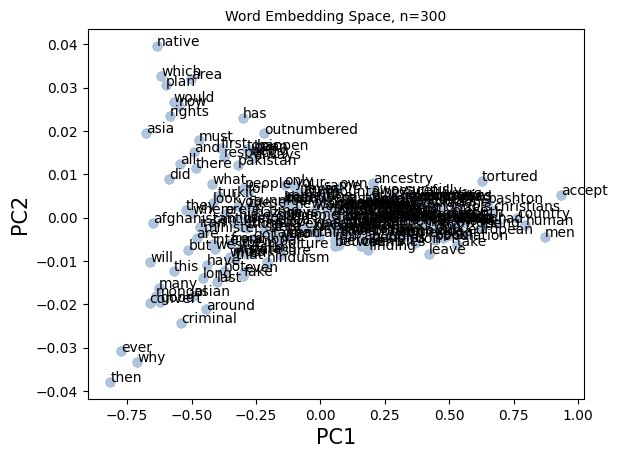

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
# fit a 2d PCA model to the vectors
X = reloaded_w2v_model.wv[reloaded_w2v_model.wv.index_to_key]
#print(X)
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
pyplot.scatter(result[:, 0], result[:, 1], color='lightsteelblue')
pyplot.xlabel("PC1",size=15)
pyplot.ylabel("PC2",size=15)
pyplot.title("Word Embedding Space, n=300",size=10)
words = list(reloaded_w2v_model.wv.index_to_key)[1:300]
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

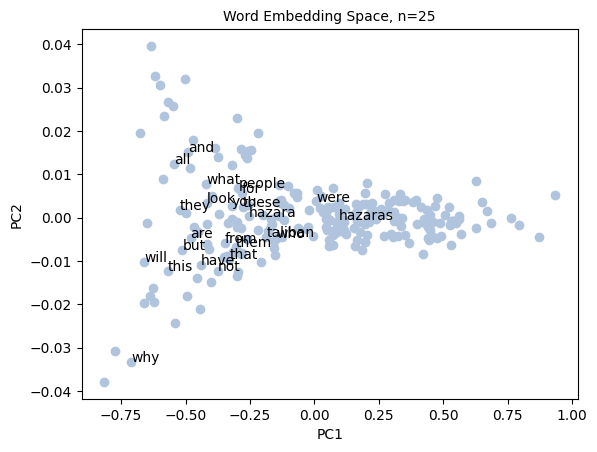

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
# fit a 2d PCA model to the vectors
X = reloaded_w2v_model.wv[reloaded_w2v_model.wv.index_to_key]
#print(X)
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1], color='lightsteelblue')
pyplot.xlabel("PC1",size=10)
pyplot.ylabel("PC2",size=10)
pyplot.title("Word Embedding Space, n=25",size=10)
words = list(reloaded_w2v_model.wv.index_to_key)[1:25]
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

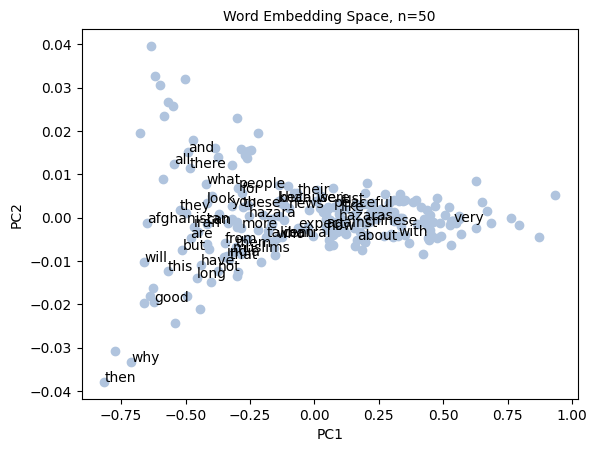

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
# fit a 2d PCA model to the vectors
X = reloaded_w2v_model.wv[reloaded_w2v_model.wv.index_to_key]
#print(X)
pca = PCA(n_components=3)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1], color='lightsteelblue')
pyplot.xlabel("PC1",size=10)
pyplot.ylabel("PC2",size=10)
pyplot.title("Word Embedding Space, n=50",size=10)
words = list(reloaded_w2v_model.wv.index_to_key)[1:50]
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

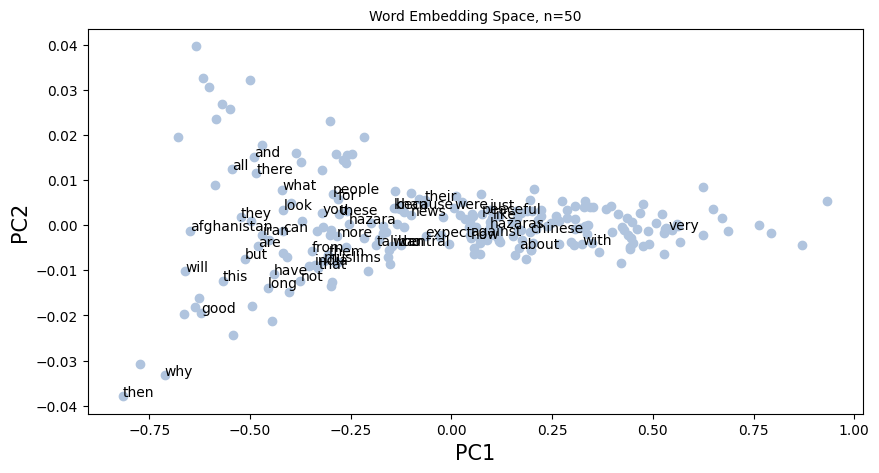

In [ ]:
# rerun with larger plot space
from sklearn.decomposition import PCA
from matplotlib import pyplot
# fit a 2d PCA model to the vectors
X = reloaded_w2v_model.wv[reloaded_w2v_model.wv.index_to_key]
#print(X)
pca = PCA(n_components=3)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.figure(figsize=(10,5))
pyplot.scatter(result[:, 0], result[:, 1], color='lightsteelblue')
pyplot.xlabel("PC1",size=15)
pyplot.ylabel("PC2",size=15)
pyplot.title("Word Embedding Space, n=50",size=10)
words = list(reloaded_w2v_model.wv.index_to_key)[1:50]
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

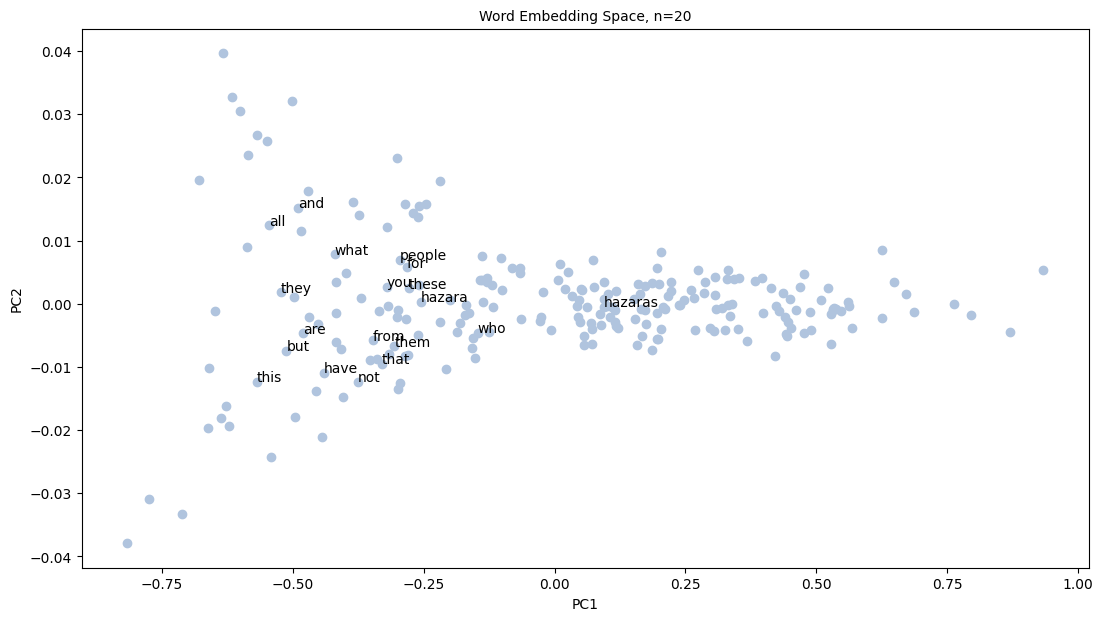

In [ ]:
# rerun with larger plot space
from sklearn.decomposition import PCA
from matplotlib import pyplot
# fit a 2d PCA model to the vectors
X = reloaded_w2v_model.wv[reloaded_w2v_model.wv.index_to_key]
#print(X)
pca = PCA(n_components=3)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.figure(figsize=(13,7))
pyplot.scatter(result[:, 0], result[:, 1], color='lightsteelblue')
pyplot.xlabel("PC1",size=10)
pyplot.ylabel("PC2",size=10)
pyplot.title("Word Embedding Space, n=20",size=10)
words = list(reloaded_w2v_model.wv.index_to_key)[1:20]
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()